In [1]:
#import libraries
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
transform_0 = A.Compose([
    A.NoOp(),
])

transform_1 = A.Compose([
    A.HorizontalFlip(p=1),
])

transform_2 = A.Compose([
    A.VerticalFlip(p=1),
])

transform_3 = A.Compose([
    A.RandomRotate90(p=1),
    A.Resize(900,900,p=1)
])

transform_4 = A.Compose([
        A.PixelDropout(p=1),
])

transform_5 = A.Compose([
        #A.ShiftScaleRotate(p=1),
        A.ColorJitter(p=1),
])

transform_6 = A.Compose([
       A.RandomBrightnessContrast(p=1),
])

transform_7 = A.Compose([
    A.Transpose(p=1),
    A.Resize(900,900,p=1)
])

transform_8 = A.Compose([
    A.GaussianBlur(p=1),
])

transform_9 = A.Compose([
    A.MedianBlur(p=1),
])

transform_10 = A.Compose([
    A.Sharpen(p=1),
])

transform_11 = A.Compose([
    A.GaussNoise(p=1),
])



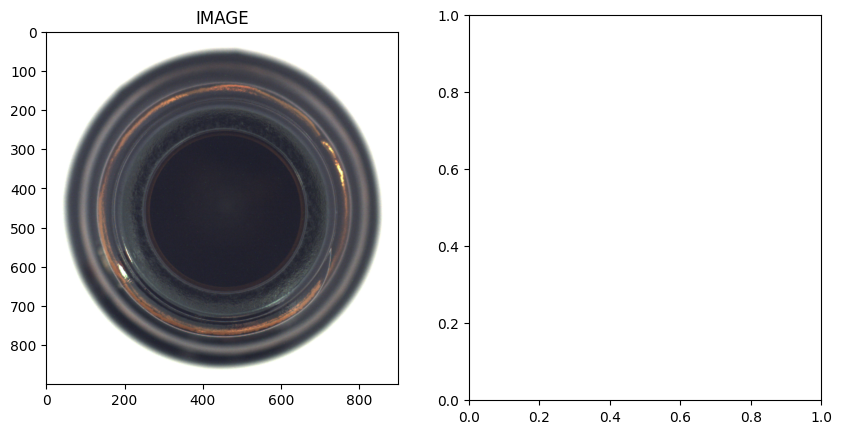

In [15]:
image_path = "/home/mayooran/MVTecAD/bottle/train/good/208.png"
#mask_path = r"D:\FYP\Augmentation\fryum\ground_truth\bad\099.png"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
# mask = np.expand_dims(mask,axis=-1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))    
ax1.set_title('IMAGE')
ax1.imshow(image)

# ax2.set_title('GROUND TRUTH')
# ax2.imshow(mask,cmap = 'gray')


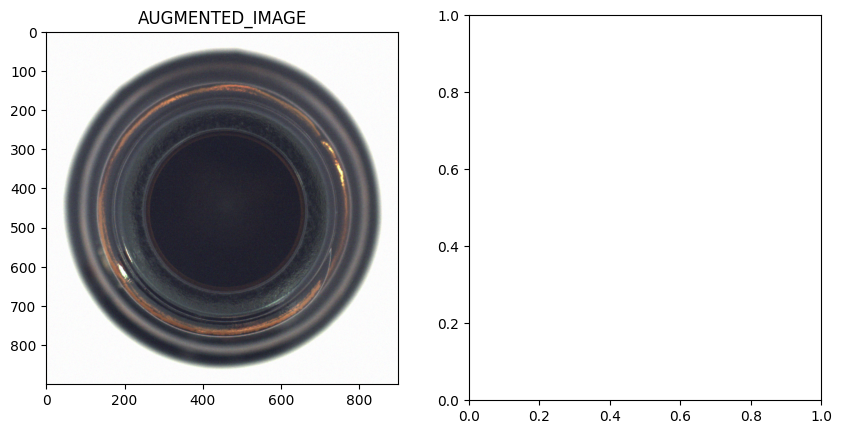

In [27]:
transformed = transform_11(image=image)
transformed_image = transformed['image']
#transformed_mask = transformed['mask']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))    
ax1.set_title('AUGMENTED_IMAGE')
ax1.imshow(transformed_image)

# ax2.set_title('AUGMENTED_GROUND TRUTH')
# ax2.imshow(transformed_mask,cmap = 'gray')

In [40]:
import os
img_files = os.listdir(r"/home/mayooran/MVTecAD/cable/train/good/")
img_files.sort()


In [41]:
len(img_files)

224

In [42]:
import random
img_files = random.sample(img_files,16)

In [43]:
import shutil
shutil.rmtree("/home/mayooran/mugunthan/patchcore-inspection-main/PATCH_CORE/Augmentation/MVTecAD_aug_fewshot16/cable/train/good/")

In [44]:

Transforms=[transform_0,transform_1,transform_2,transform_3,transform_4,transform_5,transform_6,transform_7,transform_8,transform_9,transform_10,transform_11]


data_root= r"/home/mayooran/MVTecAD/cable/train/good/"
for i in range(len(img_files)):
    image_path = os.path.join(data_root,img_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for j in range(len(Transforms)):


        transformed = Transforms[j](image=image)
        transformed_image = transformed['image']
        transformed_image = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
        
        
        cv2.imwrite(f"/home/mayooran/mugunthan/patchcore-inspection-main/PATCH_CORE/Augmentation/MVTecAD_aug_fewshot16/cable/train/good/aug_{j}_{img_files[i]}",transformed_image)
    print(i)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [6]:
def divide(x,y):
    result,power = 0,32
    y_power = y<<power
    while x>=y:
        while y_power>x:
            y_power>>=1
            power-=1
            #print(y_power,power)
        print(power)
        result+= 1<<power
        x-=y_power
        
    return result



In [7]:
divide(11,3)

1
0


3